# Random Experiments
## Rolling Two Dice
- find the probability that the sum of outcomes of the dice is even.

In [1]:
N, faces = 10^6, 1:6

numSol = sum([iseven(i + j) for i in faces, j in faces])/(length(faces)^2)
mcEst = sum([iseven(rand(faces) + rand(faces)) for _ in 1:N])/N

println("Numerical solution: ",numSol, "\nThe Monte Carlo estimate: ", mcEst)

Numerical solution: 0.5
The Monte Carlo estimate: 0.500229


## Partially Matching Passwords
- Assume that a password is exactly 8 characters in length. Each character is one of 52 possible characters: the letter "a"-"z", the letters "A"-"Z" or the digits 0-9
- *event*: The successful probablity of random attacks: matches at least one characters.

In [2]:
using Random
Random.seed!()

passLength, numMatchesForLog = 8, 1
possibleChars = ['a':'z'; 'A':'Z'; '0':'9']

correctPassword = "3xyZu4vN"

numMatch(loginPassword) = 
    sum([loginPassword[i] == correctPassword[i] for i in 1:passLength])

N = 10^7

passwords = [String(rand(possibleChars, passLength)) for _ in 1:N]
numLogs = sum([numMatch(p) >= numMatchesForLog for p in passwords])
println("Number of login attempts logged: ", numLogs)
println("Probablity of login attempts loged: ", numLogs/N)

Number of login attempts logged: 1219951
Probablity of login attempts loged: 0.1219951


## The Birthday Problem
- Assume that the distrubition of birthday is uniformed in set $\{1,\cdots,365\}$
- For $n$ people in a room, we wish to evaluate the probability that at least two people share the same birthday. Set of *sample space* is composed of ordered tuple $(x_{1},\cdots, x_{n})$. Hence, $\vert\Omega\vert = 365^{n}$
- *event* $A$ is the set of all tuples $(x_{1},\cdots,x_{j})$ where $x_{i}=x_{j}$ for some distinct $i$ and $j$
- thus, the complement of $A$
$$
\vert A^{c} \vert = 365 \cdot 364 \cdots (365-n+1) = \frac{365!}{(365-n)!}
$$
- thus, we have the $\mathbb{P}(A)$
$$
\mathbb{P}(A) = 1 - \mathbb{P}(A^{c}) = 1 - \frac{\vert A^{c} \vert}{\vert\Omega\vert} = 1 - \frac{365!}{(365-n)!\cdot 365^{n}}
$$


Maximum error: 2.461172365062727820892938546467205715971256384764337390231064159958270652057059e-16


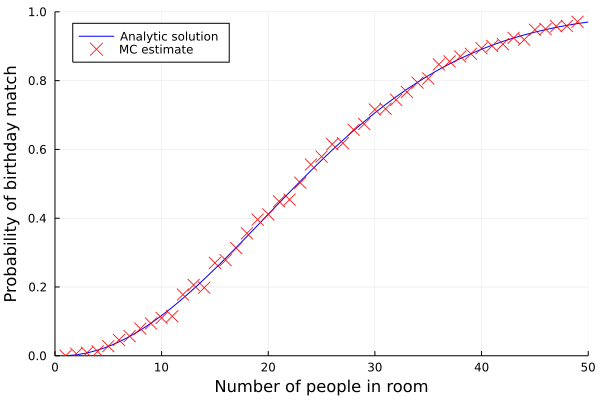

In [3]:
using Plots, Random, StatsBase, Combinatorics

matchExsits1(n) = 1 - prod([k/365 for k in 365:-1:365-n+1])
matchExsits2(n) = 1 - factorial(365,365-big(n))/365^big(n)

function byEvent(n)
    birthdays = rand(1:365, n)
    dayCounts = counts(birthdays, 1:365)
    return maximum(dayCounts) > 1
end

probEst(n) = sum([byEvent(n) for _ in 1:N])/N

xGrid = 1:50
analyticSolution1 = [matchExsits1(n) for n in xGrid]
analyticSolution2 = [matchExsits2(n) for n in xGrid]
println("Maximum error: $(maximum(abs.(analyticSolution1-analyticSolution2)))")

N = 10^3
mcEstimates = [probEst(n) for n in xGrid]

plot(xGrid, analyticSolution1, c=:blue, label="Analytic solution")
scatter!(xGrid, mcEstimates, c=:red, ms=6, msw=0, shape=:xcross,
    label="MC estimate", xlims=(0,50), ylims=(0,1),
    xlabel="Number of people in room",
    ylabel="Probability of birthday match",
    legend=:topleft)

## Sampling With and Without Replacement
- Consider a small pond with a small population of 7 fish, 3 of which are gold and 4 of which are silver. Let $\mathbb{P}{(G_{n})}$ denote the event of catching $n$ gold fish.
- There are two sampling policies:
  - **Catch and keep** (Sampling without replacement)
  - **Catch and release** (Sampling with replacement)

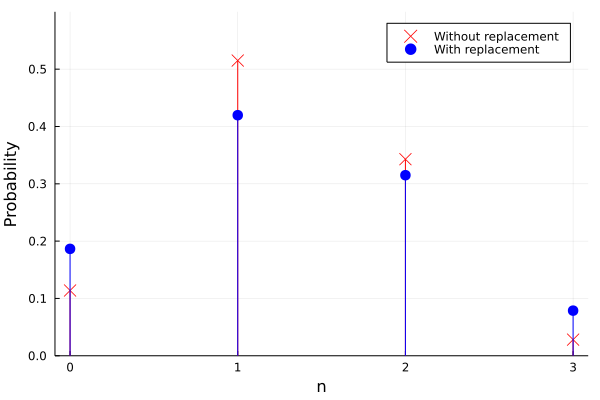

In [4]:
using StatsBase, Plots

function proportionFished(gF, sF, n, N, withReplacement = false)
    function fishing()
        fishInPond = [ones(Int64, gF); zeros(Int64,sF)]
        fishCaught = Int64[]
        
        for fish in 1:n
            fished = rand(fishInPond)
            push!(fishCaught, fished)
            if withReplacement == false
                deleteat!(fishInPond, findfirst(x -> x==fished, fishInPond))
            end
        end
        sum(fishCaught)
    end

    simulations = [fishing() for _ in 1:N]
    proportions = counts(simulations, 0:n)/N

    if withReplacement
        plot!(0:n, proportions,
            line=:stem, marker=:circle, c=:blue, ms=6, msw=0,
            label="With replacement",
            xlabel="n",
            ylims=(0,0.6), ylabel="Probability")
    else
        plot!(0:n, proportions,
            line=:stem, marker=:xcross, c=:red, ms=6, msw=0,
            label="Without replacement")
    end
end

N = 10^6
goldFish, silverFish, n = 3,4,3
plot()
proportionFished(goldFish,silverFish, n, N)
proportionFished(goldFish,silverFish, n, N, true)

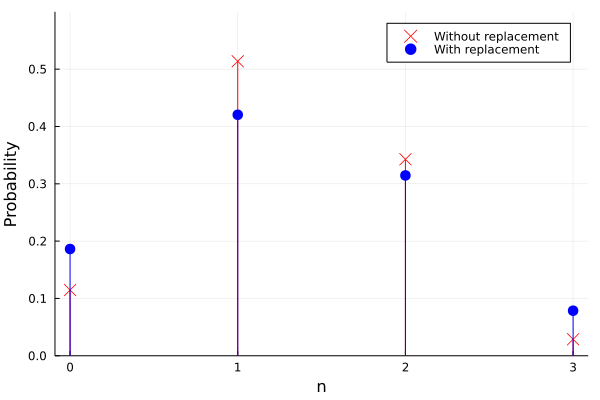

In [5]:
using StatsBase, Plots

function proportionFished(gF, sF, n, N, withReplacement = false)
    function fishing()
        fishInPond = [ones(Int64, gF); zeros(Int64,sF)]
        if withReplacement
            fishCaught = sample(fishInPond, n, replace=true)  
        else
            fishCaught = sample(fishInPond, n, replace=false)
        end
        sum(fishCaught)
    end

    simulations = [fishing() for _ in 1:N]
    proportions = counts(simulations, 0:n)/N

    if withReplacement
        plot!(0:n, proportions,
            line=:stem, marker=:circle, c=:blue, ms=6, msw=0,
            label="With replacement",
            xlabel="n",
            ylims=(0,0.6), ylabel="Probability")
    else
        plot!(0:n, proportions,
            line=:stem, marker=:xcross, c=:red, ms=6, msw=0,
            label="Without replacement")
    end
end

N = 10^6
goldFish, silverFish, n = 3,4,3
plot()
proportionFished(goldFish,silverFish, n, N)
proportionFished(goldFish,silverFish, n, N, true)

## Lattice Paths
- Considering a square grid on which an ant walks from the southwest corner to northeast corner, taking either a step north or a step east at each grid intersection. The *sample space* is $\Omega = \text{All possible lattice paths}$
- For $n\times n$ square grid, $\vert\Omega\vert={2n \choose n}=C_{2n}^{n}=\frac{(2n)!}{(n!)^{2}}$, out of the $2n$ steps, $n$ steps need to be "north" and $n$ need to be "east".
- *event* $A = \text{Lattice paths that stay above the diagonal the whole way from }(0,0) \text{ to } (n,n)$, thus $\vert A\vert = \frac{1}{n+1}{2n \choose n}$
- ***Catalan Number*** $C_{n} = \frac{1}{n+1}{2n \choose n}$
- $\text{Model}_{\rm I}\quad \mathbb{P}_{\rm I}(A) = \frac{\vert A \vert}{\vert\Omega\vert} = \frac{1}{n+1}$
- $\text{Model}_{\rm II} \quad \mathbb{P}_{\rm II}(A) = \frac{1}{2^{2n-1}}\cdot{2n-1 \choose n}$ (just considering the first step)

Model I: 0.16666666666666666	 Model II: 0.24497


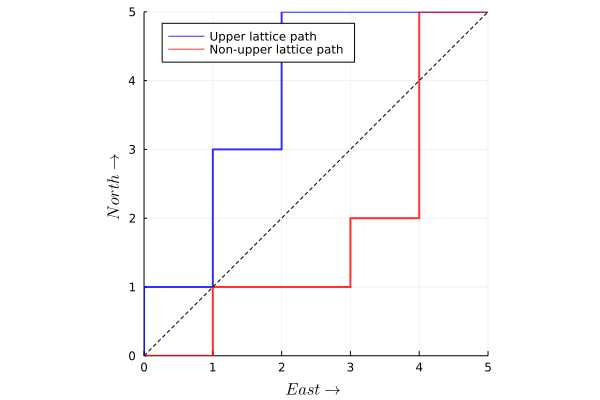

In [6]:
using Random, Combinatorics, Plots, LaTeXStrings
Random.seed!(12)

n, N = 5, 10^5

function isUpperLattice(v)
    for i in 1:Int(length(v)/2)
        sum(v[1:2*i - 1]) >= i ? continue : return false
    end
    return true
end

omega = unique(permutations([zeros(Int,n); ones(Int,n)]))
A = omega[isUpperLattice.(omega)]
pA_modelI = length(A)/length(omega)

function randomWalkPath(n)
    x,y = 0,0
    path = Int64[]
    while x < n && y<n
        if rand()<0.5
            x += 1
            push!(path,0)
        else
            y += 1
            push!(path,1)
        end
    end
    append!(path, x<n ? zeros(Int64, n-x) : ones(Int64, n-y))
    return path
end

pA_modelIIest = sum([isUpperLattice(randomWalkPath(n)) for _ in 1:N])/N
println("Model I: ", pA_modelI, "\t Model II: ", pA_modelIIest)

function plotPath(v,l,c)
    x, y = 0, 0
    graphX, graphY = [x], [y]
    for i in v
        if i == 0
            x += 1
        else
            y += 1
        end
        push!(graphX,x), push!(graphY, y)
    end
    plot!(graphX, graphY,
        la=0.8, lw=2, label=l, c=c, ratio=:equal, legend=:topleft,
        xlims=(0,n), ylims=(0,n),
        xlabel=L"East\rightarrow", ylabel=L"North\rightarrow")
end
plot()
plotPath(rand(A),"Upper lattice path", :blue)
plotPath(rand(setdiff(omega, A)), "Non-upper lattice path", :red)
plot!([0,n],[0,n],ls=:dash, c=:black, label="")